# Iris

     SepalLength  SepalWidth  PetalLength  PetalWidth  Iris
0            5.1         3.5          1.4         0.2     0
1            4.9         3.0          1.4         0.2     0
2            4.7         3.2          1.3         0.2     0
3            4.6         3.1          1.5         0.2     0
4            5.0         3.6          1.4         0.2     0
..           ...         ...          ...         ...   ...
145          6.7         3.0          5.2         2.3     2
146          6.3         2.5          5.0         1.9     2
147          6.5         3.0          5.2         2.0     2
148          6.2         3.4          5.4         2.3     2
149          5.9         3.0          5.1         1.8     2

[150 rows x 5 columns]
     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.

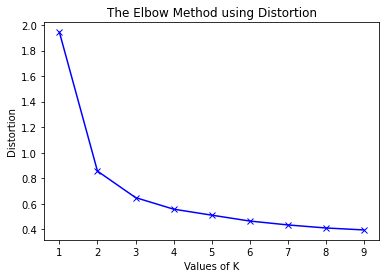

1 : 680.8244
2 : 152.36870647733906
3 : 78.94084142614602
4 : 57.31787321428571
5 : 46.795174358974364
6 : 38.95701115711985
7 : 34.18920546865627
8 : 30.077530998389697
9 : 27.995416666666667


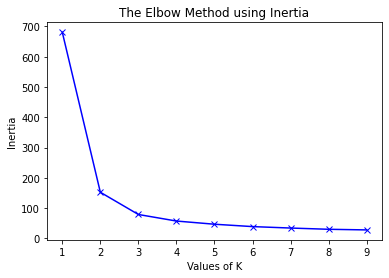

In [ ]:
# -*- coding: utf-8 -*-
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

#Importing the credit card default data
# download the csv file in the same folder as the python file. Run programme in that directory

df = pd.read_csv("Iris(Edit).csv")
print(df)

# only have the columns ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, default payment next month

# separate the data into the features and classification
X = df.drop(columns = ['Iris'])
y = df['Iris']
print(X)
print("Actual Y")
print(y)

# implement the KMeans
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=0)
model.fit(X[:], y[:])
y_predicted = model.predict(X)
print("Predicted Y")
print(y_predicted)

# assses accuracy of model
# since KMeans only separates into two different categories without labels, we need to account for different labels in python
if sum(y_predicted == np.array(y)) > sum(y_predicted != np.array(y)):
    y_predicted_labelled = y_predicted
    score = sum(y_predicted == np.array(y))
else:
    y_predicted_labelled = abs(y_predicted - 1)
    score = sum(y_predicted != np.array(y))

accuracy = score/ y.shape[0]
print('The model has an accuracy of {}%'.format(round(accuracy*100, 2)))


# How do you find the optimal K
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,10)

for k in K: 
    #Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    
    # The distortions in this case is the difference between each data point coordinates and the centroid coordinates. 
    # We are using euclidean distance in this case..
    # Higher K leads to lower distance but runs the risk of overfitting
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                      'euclidean'),axis=1)) / X.shape[0])

    # Sum of squared distances of samples to their closest cluster center.
    # inbuilt in sklearn
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                 'euclidean'),axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

for key,val in mapping1.items():
    print(str(key)+' : '+str(val))



plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

for key,val in mapping2.items():
    print(str(key)+' : '+str(val))

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# Credit Card Default

In [ ]:
# -*- coding: utf-8 -*-
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

#Importing the credit card default data
# download the csv file in the same folder as the python file. Run programme in that directory
file_name = 'CreditCardDefault.csv'
sheet = 'Sheet1'
df = pd.read_csv(file_name)
df_filtered = df.drop(columns = ['PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])
# only have the columns ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, default payment next month

# separate the data into the features and classification
X = df_filtered.drop(columns = ['default payment next month'])
y = df_filtered['default payment next month']

# implement the KMeans
# use first two hundred entries as training set
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=0)
model.fit(X[0:200], y[0:200])
y_predicted = model.predict(X)
print(y_predicted)

# assses accuracy of model
# since KMeans only separates into two different categories without labels, we need to account for different labels in python
if sum(y_predicted == np.array(y)) > sum(y_predicted != np.array(y)):
    y_predicted_labelled = y_predicted
    score = sum(y_predicted == np.array(y))
else:
    y_predicted_labelled = abs(y_predicted - 1)
    score = sum(y_predicted != np.array(y))   
    
accuracy = score/ y.shape[0]
print('The model has an accuracy of {}%'.format(round(accuracy*100, 2)))
